In [ ]:
import pandas as pd 
import os
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [18]:
def data_processing(df, df_name=''):
    try:
        # Step 1: Get new columns - day of the week and hour
        df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format
        df['date_without_time'] = df['Date'].dt.date  # Extract only the date
        df['day_of_week'] = df['Date'].dt.day_name()  # Get the day name (e.g., Monday, Tuesday)
        df['hour'] = df['Date'].dt.hour  # Get the hour of the day
        print("Step 1: Date processing completed successfully.")

        # Step 2: Calculate total visits on the day
        df['total_visits_on_the_day'] = df.groupby(['BGFIPS', 'date_without_time'])['Visits_Mobility'].transform('sum')
        print("Step 2: Total visits calculation completed successfully.")

        # Step 3: Calculate the mean visits per day per weekday
        df['avg_visits_perday_perweekday'] = df.groupby(['BGFIPS', 'day_of_week'])['total_visits_on_the_day'].transform('mean')
        print("Step 3: Average visits calculation completed successfully.")

        # Step 4: Group by 'date_without_time' and 'BGFIPS', count unique 'EVENT_ID's, and merge the rows
        df_num_events = df.groupby(['date_without_time', 'BGFIPS'], as_index=False).agg(num_events=('EVENT_ID', 'nunique'))
        df = pd.merge(df, df_num_events, on=['date_without_time', 'BGFIPS'], how='left')
        print("Step 4: Event count and merge completed successfully.")

        # Step 5: Calculate percentage visit change
        df['percentage_visit_change'] = (df['total_visits_on_the_day'] - df['avg_visits_perday_perweekday']) / df['avg_visits_perday_perweekday']
        print("Step 5: Percentage visit change calculation completed successfully.")

        # Step 6: Save dataset
        # output_path = f'../../data_CityEvent/processed/2.3.3_processed_daily_improved/{df_name}.csv'
        # df.to_csv(output_path, index=False)
        # print(f"Step 6: Dataset saved successfully to {output_path}.")

        # Step 7: Show Box Plot
        create_box_plot(df, df_name)
        print("Step 7: Box plot created successfully.")
        
    except Exception as e:
        print(f"An error occurred during processing: {e}")
        
    # Optionally return the modified dataframe for further use
    return df


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def events_class(df):
    df['events_class'] = df['num_events'].apply(lambda x: 1 if x <= 2 else (2 if x<= 4 else (3)))
    return df

def create_box_plot(df, df_name='event_category'):
    # Create the plot


    df = events_class(df)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='events_class', y='percentage_visit_change', palette='coolwarm')
    plt.xlabel('Class of Events')
    plt.ylabel('Percentage Visit Change')
    plt.title(df_name)

    # Save the plot
    plt.savefig(f'../../results/2.3.3_box_plots_with_class_def/{df_name}.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

In [32]:
import os
# LOOP
filepath = '../../data_CityEvent/processed/1.5.3_events_join_w_mobility/'
filenames = os.listdir(filepath)
list(filenames)

['attended_community_hourly_visits.csv',
 'attended_concerts_hourly_visits.csv',
 'attended_conferences_hourly_visits.csv',
 'attended_expos_hourly_visits.csv',
 'attended_festivals_hourly_visits.csv',
 'attended_performing-arts_hourly_visits.csv',
 'attended_sports_hourly_visits.csv',
 'non_attended_academic_hourly_visits.csv',
 'non_attended_daylight-savings_hourly_visits.csv',
 'non_attended_observances_hourly_visits.csv',
 'non_attended_politics_hourly_visits.csv',
 'non_attended_public-holidays_hourly_visits.csv',
 'non_attended_school-holidays_hourly_visits.csv',
 'unscheduled_airport-delays_hourly_visits.csv',
 'unscheduled_disasters_hourly_visits.csv',
 'unscheduled_health-warnings_hourly_visits.csv',
 'unscheduled_severe-weather_hourly_visits.csv',
 'unscheduled_terror_hourly_visits.csv']

In [33]:
df_name = 'attended_community'

Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_23940\123708196.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='events_class', y='percentage_visit_change', palette='coolwarm')


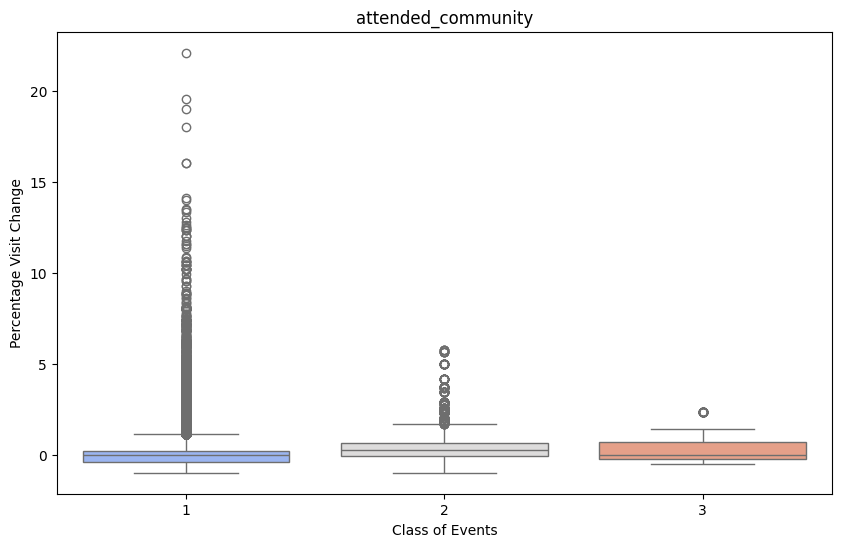

Step 7: Box plot created successfully.


,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility,date_without_time,day_of_week,hour,total_visits_on_the_day,avg_visits_perday_perweekday,num_events,percentage_visit_change,events_class
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0,2021-12-04,Saturday,6,129.0,266.460870,1,-0.515876,1
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0,2021-12-04,Saturday,7,129.0,266.460870,1,-0.515876,1
2,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 08:00:00,36.0,2021-12-04,Saturday,8,129.0,266.460870,1,-0.515876,1
3,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 09:00:00,56.0,2021-12-04,Saturday,9,129.0,266.460870,1,-0.515876,1
4,BrGhonYexS6JirL4g4,60372073012,POINT (-118.2474094 34.052744),2022-08-27 06:00:00,2022-08-27 06:00:00,community,2022-08-27 06:00:00,12.0,2022-08-27,Saturday,6,39.0,2178.011111,2,-0.982094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144244,QrN3qvwV34Fyv68T2w,60230001001,POINT (-124.1785818 40.7918034),2021-06-12 20:00:00,2021-06-13 03:00:00,community,2021-06-12 23:00:00,10.0,2021-06-12,Saturday,23,81.0,226.495238,1,-0.642377,1
144245,QrN3qvwV34Fyv68T2w,60230001001,POINT (-124.1785818 40.7918034),2021-06-12 20:00:00,2021-06-13 03:00:00,community,2021-06-13 00:00:00,7.0,2021-06-13,Sunday,0,16.0,192.715385,1,-0.916976,1
144246,QrN3qvwV34Fyv68T2w,60230001001,POINT (-124.1785818 40.7918034),2021-06-12 20:00:00,2021-06-13 03:00:00,community,2021-06-13 01:00:00,3.0,2021-06-13,Sunday,1,16.0,192.715385,1,-0.916976,1
144247,QrN3qvwV34Fyv68T2w,60230001001,POINT (-124.1785818 40.7918034),2021-06-12 20:00:00,2021-06-13 03:00:00,community,2021-06-13 02:00:00,1.0,2021-06-13,Sunday,2,16.0,192.715385,1,-0.916976,1


In [34]:
df = pd.read_csv(f'{filepath}/{df_name}_hourly_visits.csv')

data_processing(df, df_name)

,EVENT_ID,BGFIPS,geometry,EVENT_START_BOSTON,EVENT_END_BOSTON,CATEGORY,Date,Visits_Mobility
0,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 06:00:00,12.0
1,Q8qTSY8YLfHCpz65tE,60133390023,POINT (-122.064 37.9089),2021-12-04 06:00:00,2021-12-04 09:00:00,community,2021-12-04 07:00:00,25.0


Step 1: Date processing completed successfully.
Step 2: Total visits calculation completed successfully.
Step 3: Average visits calculation completed successfully.
Step 4: Event count and merge completed successfully.
Step 5: Percentage visit change calculation completed successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_23940\135493988.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_events', y='percentage_visit_change', palette='coolwarm')


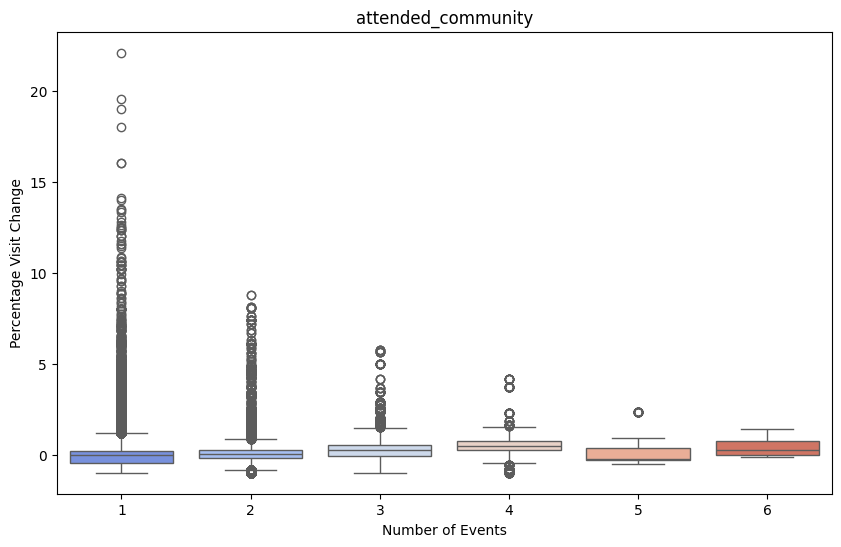

Step 7: Box plot created successfully.


In [ ]:
for filename in filenames:
    
    df_name = filename[:-18]
    df = pd.read_csv(f'{filepath}/{df_name}_hourly_visits.csv')

    # data_processing(df, df_name)
    break